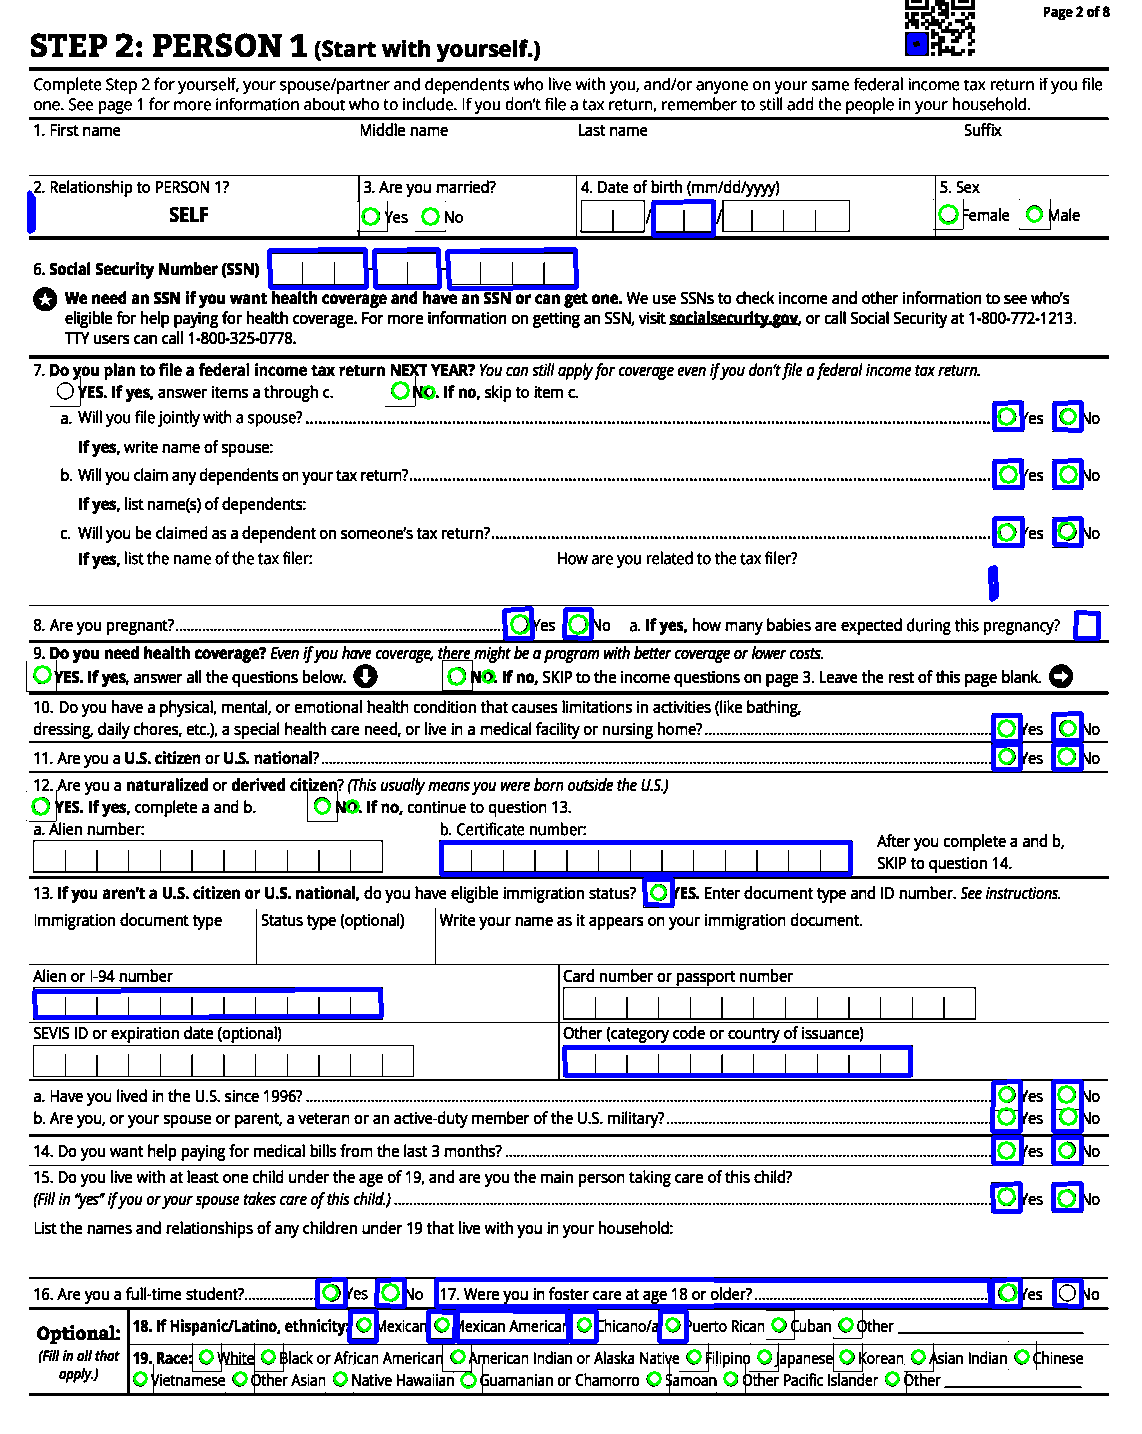

In [4]:
from imutils.perspective import four_point_transform
from google.colab.patches import cv2_imshow
from imutils import contours
import numpy as np
import imutils
import cv2
#------------------------------------------Circles--------------------------------------------------------------------
im = cv2.imread("/content/drive/My Drive/FormProcessing/sample_forms/test1.png")
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray, 200, 255,cv2.THRESH_BINARY)
cimg = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

c = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT,1, 15, param1=50, param2=14, minRadius=5,maxRadius=10)
c = np.uint16(np.around(c))


for i in c[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    #cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)


#--------------------------------------------Rectangles------------------------------------------------------------------

blurred = cv2.GaussianBlur(gray, (1, 11), 0)
thresholded = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 19, 2)
contours, hierarchy = cv2.findContours(
    thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#e = cv2.erode(img,kernel,iterations = 2)  
#d = cv2.dilate(e,kernel,iterations = 1)

rects = []
peris = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if w*h>50 and w>5 and h>5 and w*h<50000:
      peri = cv2.arcLength(c, True)
      peris.append(peri)
      approx = cv2.approxPolyDP(c, 0.02 * peri, True)
      # check if the approximated contour has four points
      # if so, it can be labelled as a rectangle
      if len(approx) == 4:
              rects.append(approx)
contoured = cv2.drawContours(cimg, rects, -1, (255, 0, 0), 3)
#--------------------------------------------------------------------------------------------------------------------------


cv2_imshow(cimg)